### Codigo general a todos los df's

In [118]:
#importo librerias
import pandas as pd #Manejo de dataframes
import numpy as np #Creacion de arrays y manejo de estadisticas
import missingno as msno #Utilizada en la visualizacion de valores nulos
import re #utilizada en la parte de limpieza de caracteres extranos
import scipy.stats as st #Utilizacion para optencion de estadisticas

In [119]:
#Listas de valores nulos
common_na_strings = ["missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",]

common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

## Denuncias

### Carga CSV

In [160]:
#Data frames de denuncias
#Denuncias
df_denuncias_uno = pd.read_csv('../datos/csv brutos/oficina-rescate-denuncias-202001-202307.csv', index_col=None)
#denuncias referidos
df_denuncias_dos = pd.read_csv('../datos/csv brutos/oficina-rescate-denuncias-referidos-202001-202307.csv', index_col=None)

### Modificacion columnas

In [154]:
# Renombrar y eliminar columnas en df_denuncias_uno
df_denuncias_uno = df_denuncias_uno.drop(['provincia_indec_id', 'denunciante_nacionalidad'], axis=1)
df_denuncias_uno = df_denuncias_uno.rename(columns={'denunciante_locaclidad': 'localidad', 'denunciante_provincia': 'provincia'})

# Renombrar columna en df_denuncias_dos y eliminar columnas redundantes
df_denuncias_dos = df_denuncias_dos.drop(['nacionalidad', 'embarazada', 'discapacidad', 'provincia_indec_id'], axis=1)
df_denuncias_dos = df_denuncias_dos.rename(columns={'fecha_ingreso_denuncia': 'fecha_ingreso'})

In [161]:
df_denuncias_uno.reset_index(drop=True, inplace=True)
df_denuncias_dos.reset_index(drop=True, inplace=True)

In [164]:
# Usar pd.DataFrame.append() para agregar df_denuncias_dos al final de df_denuncias_uno
df_denuncias = pd.concat([df_denuncias_uno, df_denuncias_dos], ignore_index=True)


In [165]:
#Elimino columnas con muchos valores faltantes
df_denuncias = df_denuncias.drop([ 'derivacion2_institucion','derivacion2_fecha', 'derivacion2_judicializa','derivacion3_institucion', 'derivacion3_fecha','derivacion3_judicializa', 'referido_tipo', 'genero','edad_aparente'], axis=1)

In [166]:
df_denuncias.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id,fecha_ingreso_denuncia,nacionalidad,embarazada,discapacidad
89,2020-01-19,NaN,1525654505,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1371,2020-12-11,NaN,3545758415,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,...,NaN,Denunciante - ciudadano,Derivado de otro organismo,Hombre,50.0,2.0,NaN,NaN,NaN,NaN
8304,NaN,NaN,1515757515,NaN,NaN,NaN,Trata,Explotación laboral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-19,NaN,No,NaN


### Valores

### Limpieza de valores con simbolos extraños


In [ ]:
#Sin simbolos extranos

### Remplazo Na

In [76]:
df_denuncias = df_denuncias.replace(
    to_replace = common_na_strings,
    value = np.nan
).replace(
    to_replace = common_na_numbers,
    value = np.nan
)

<AxesSubplot:>

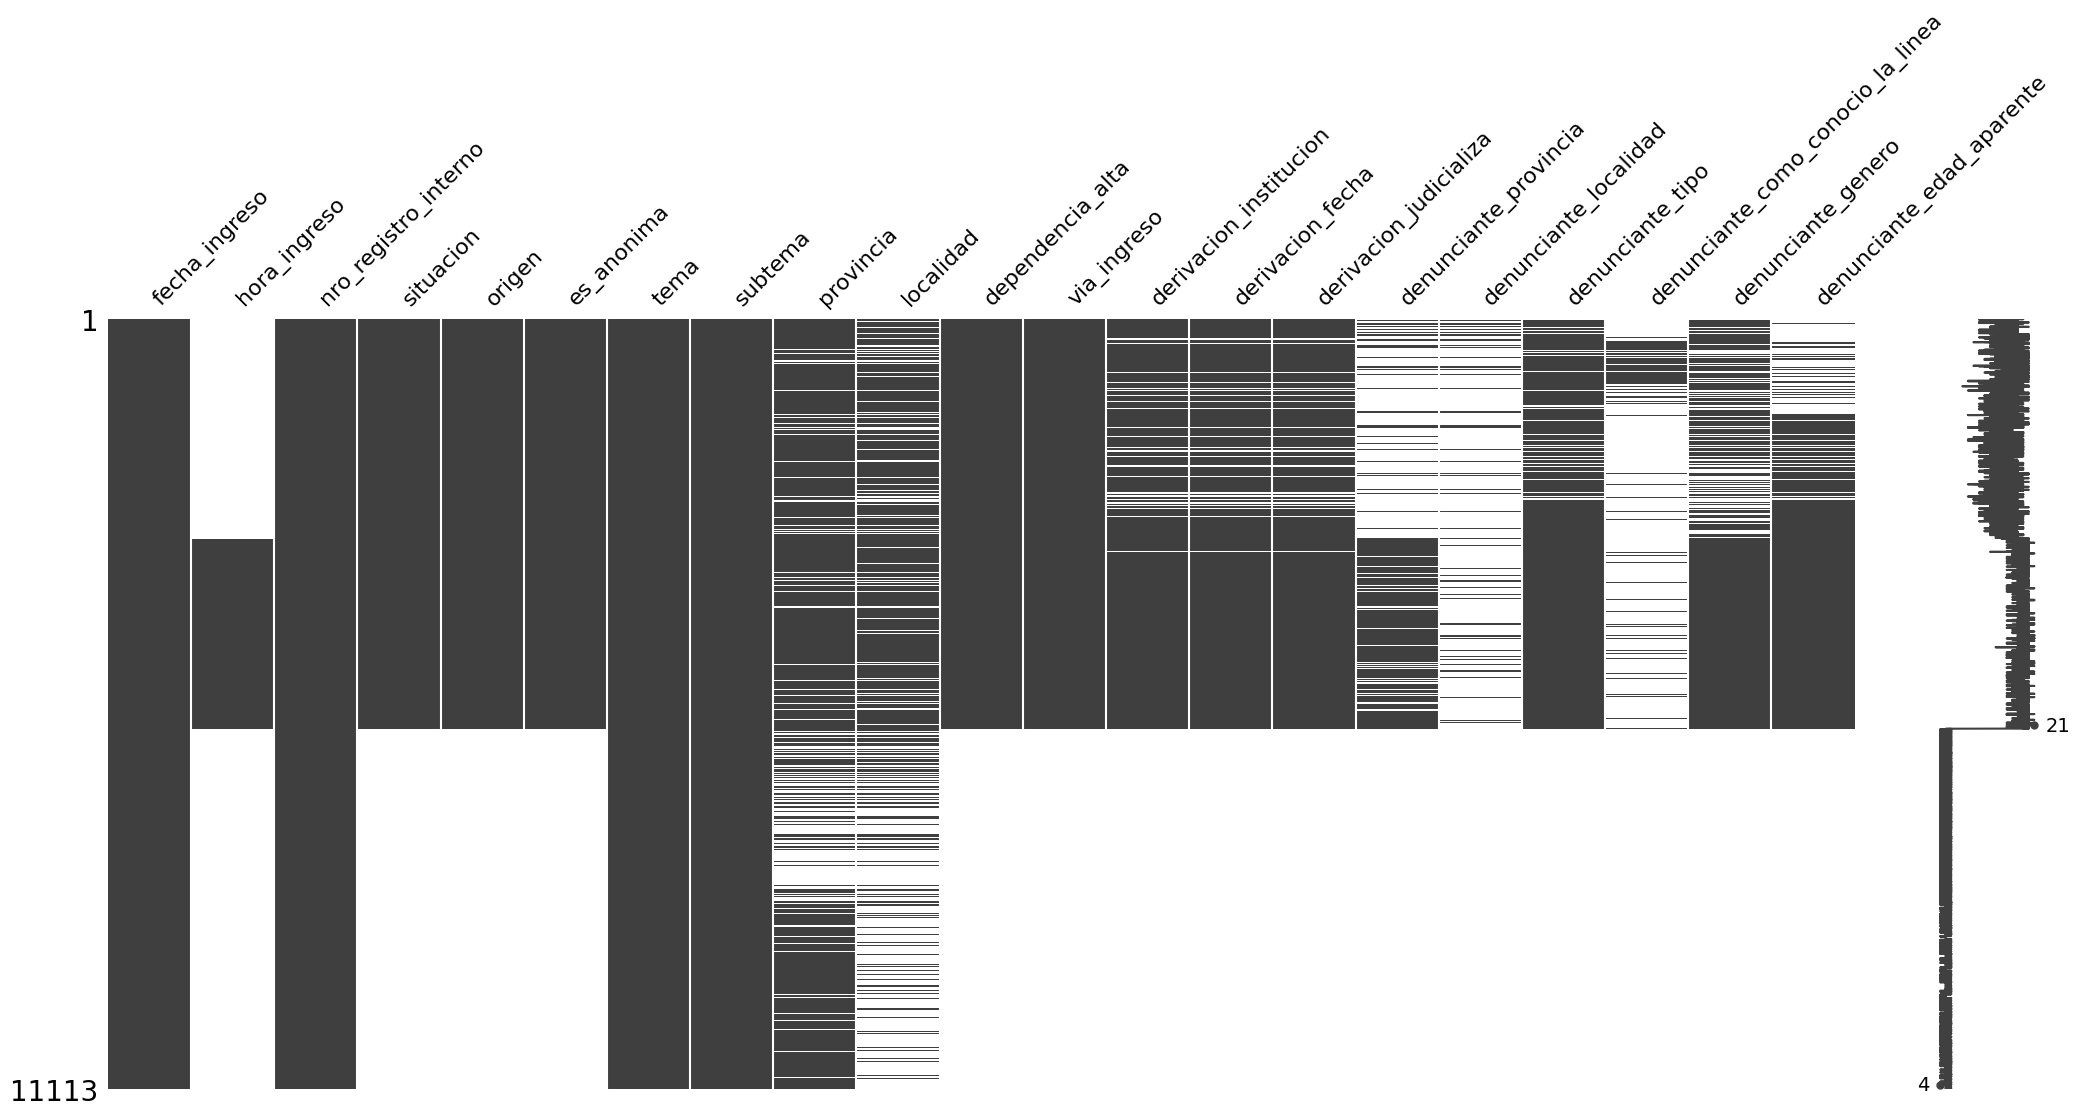

In [82]:
msno.matrix(df_denuncias)

<AxesSubplot:>

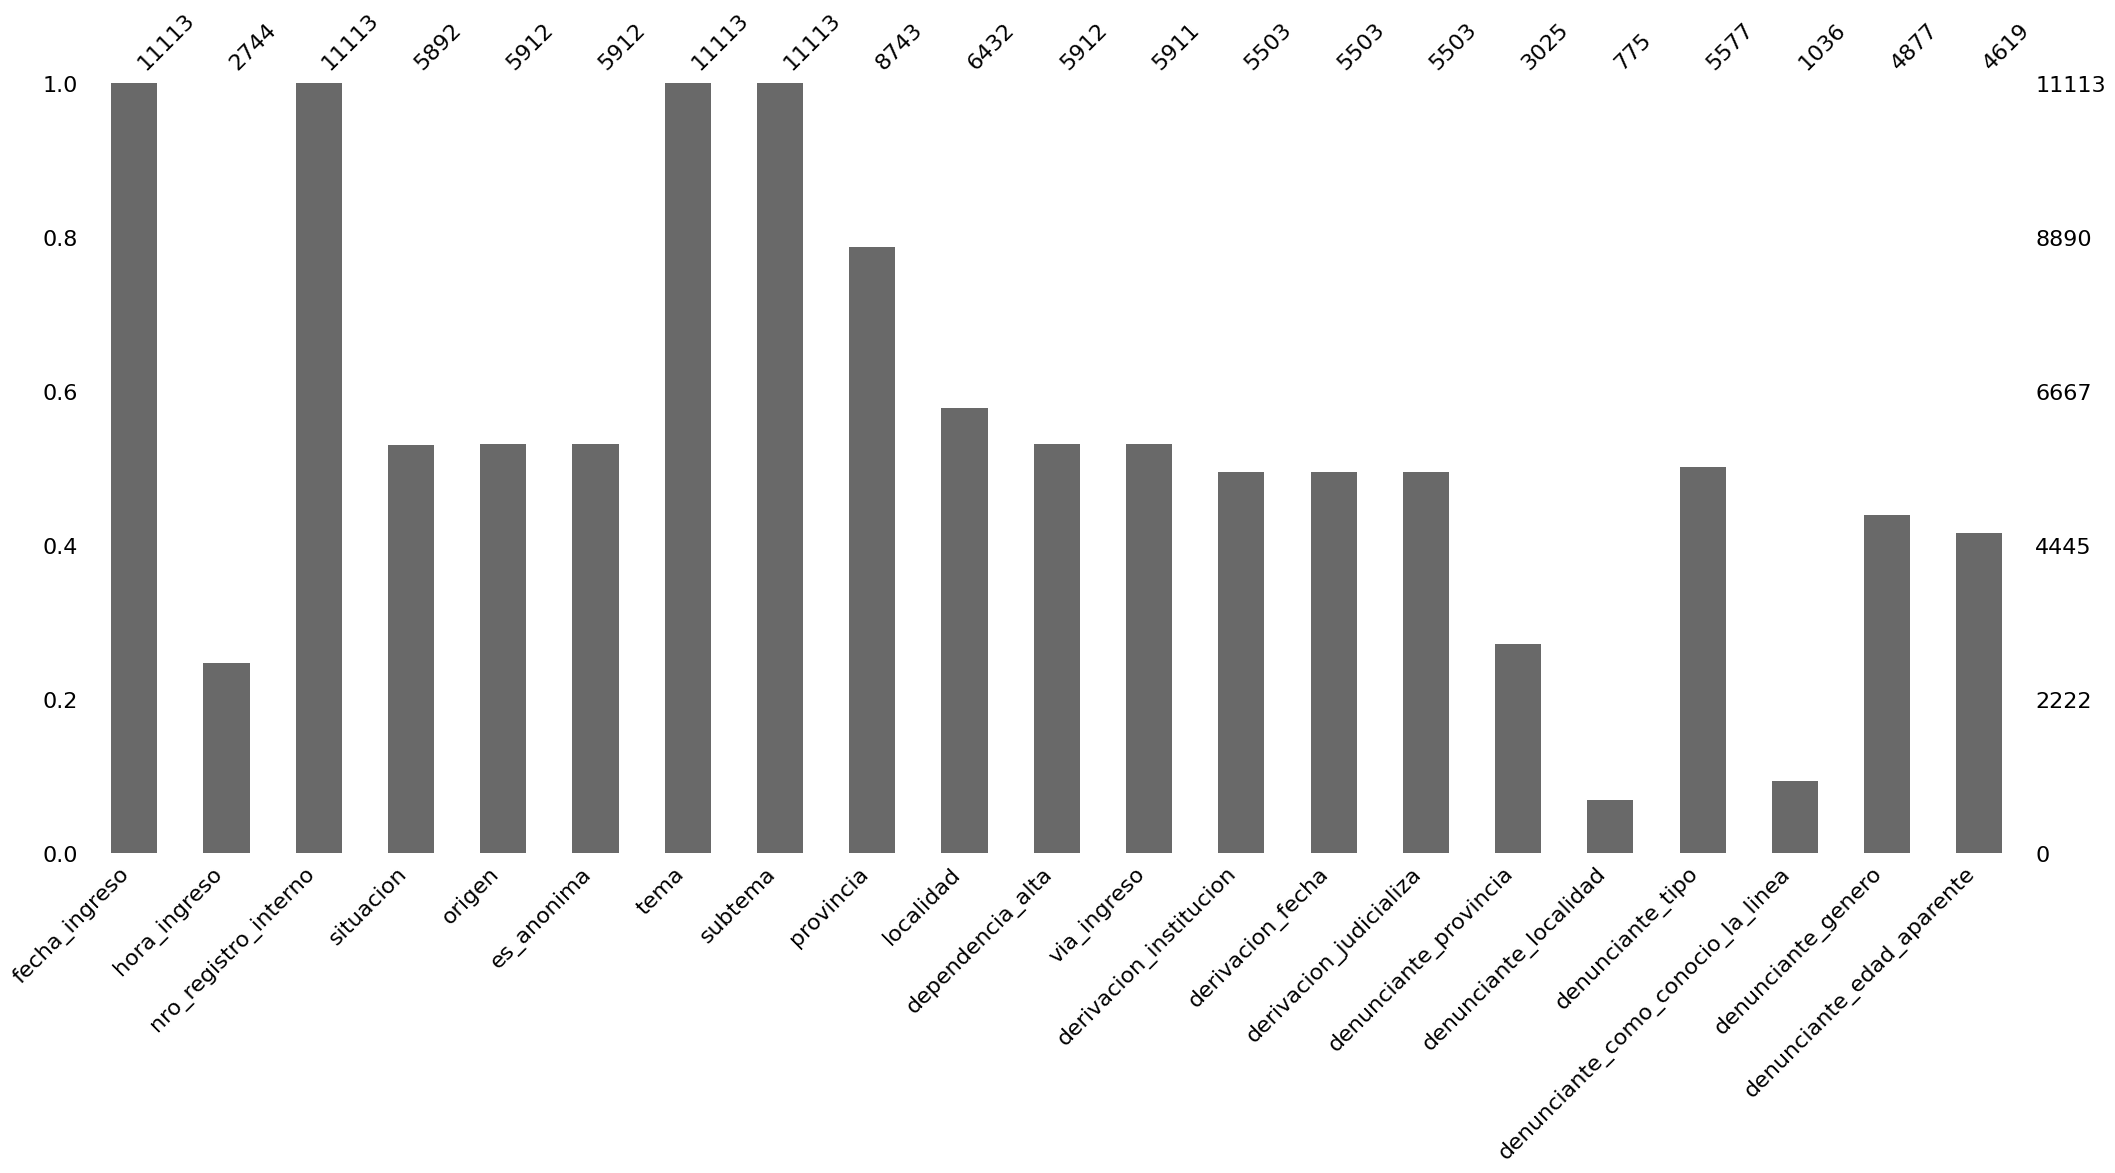

In [83]:
msno.bar(df_denuncias)

In [93]:
#Se recorta el df hasta el maximo de filas de la columna localidad
df_denuncias = df_denuncias[df_denuncias.index <= len(df_denuncias.localidad)]
df_denuncias.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente
89,2020-01-19,NaN,1525654505,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,...,Línea 145,Gendarmería Nacional Argentina,2020-01-19 23:30,Sí,NaN,NaN,NaN,NaN,NaN,NaN
1371,2020-12-11,NaN,3545758415,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,...,Línea 145,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,Derivado de otro organismo,Hombre,50.0
2392,2021-11-19,NaN,1515757515,NaN,NaN,NaN,Trata,Explotación laboral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

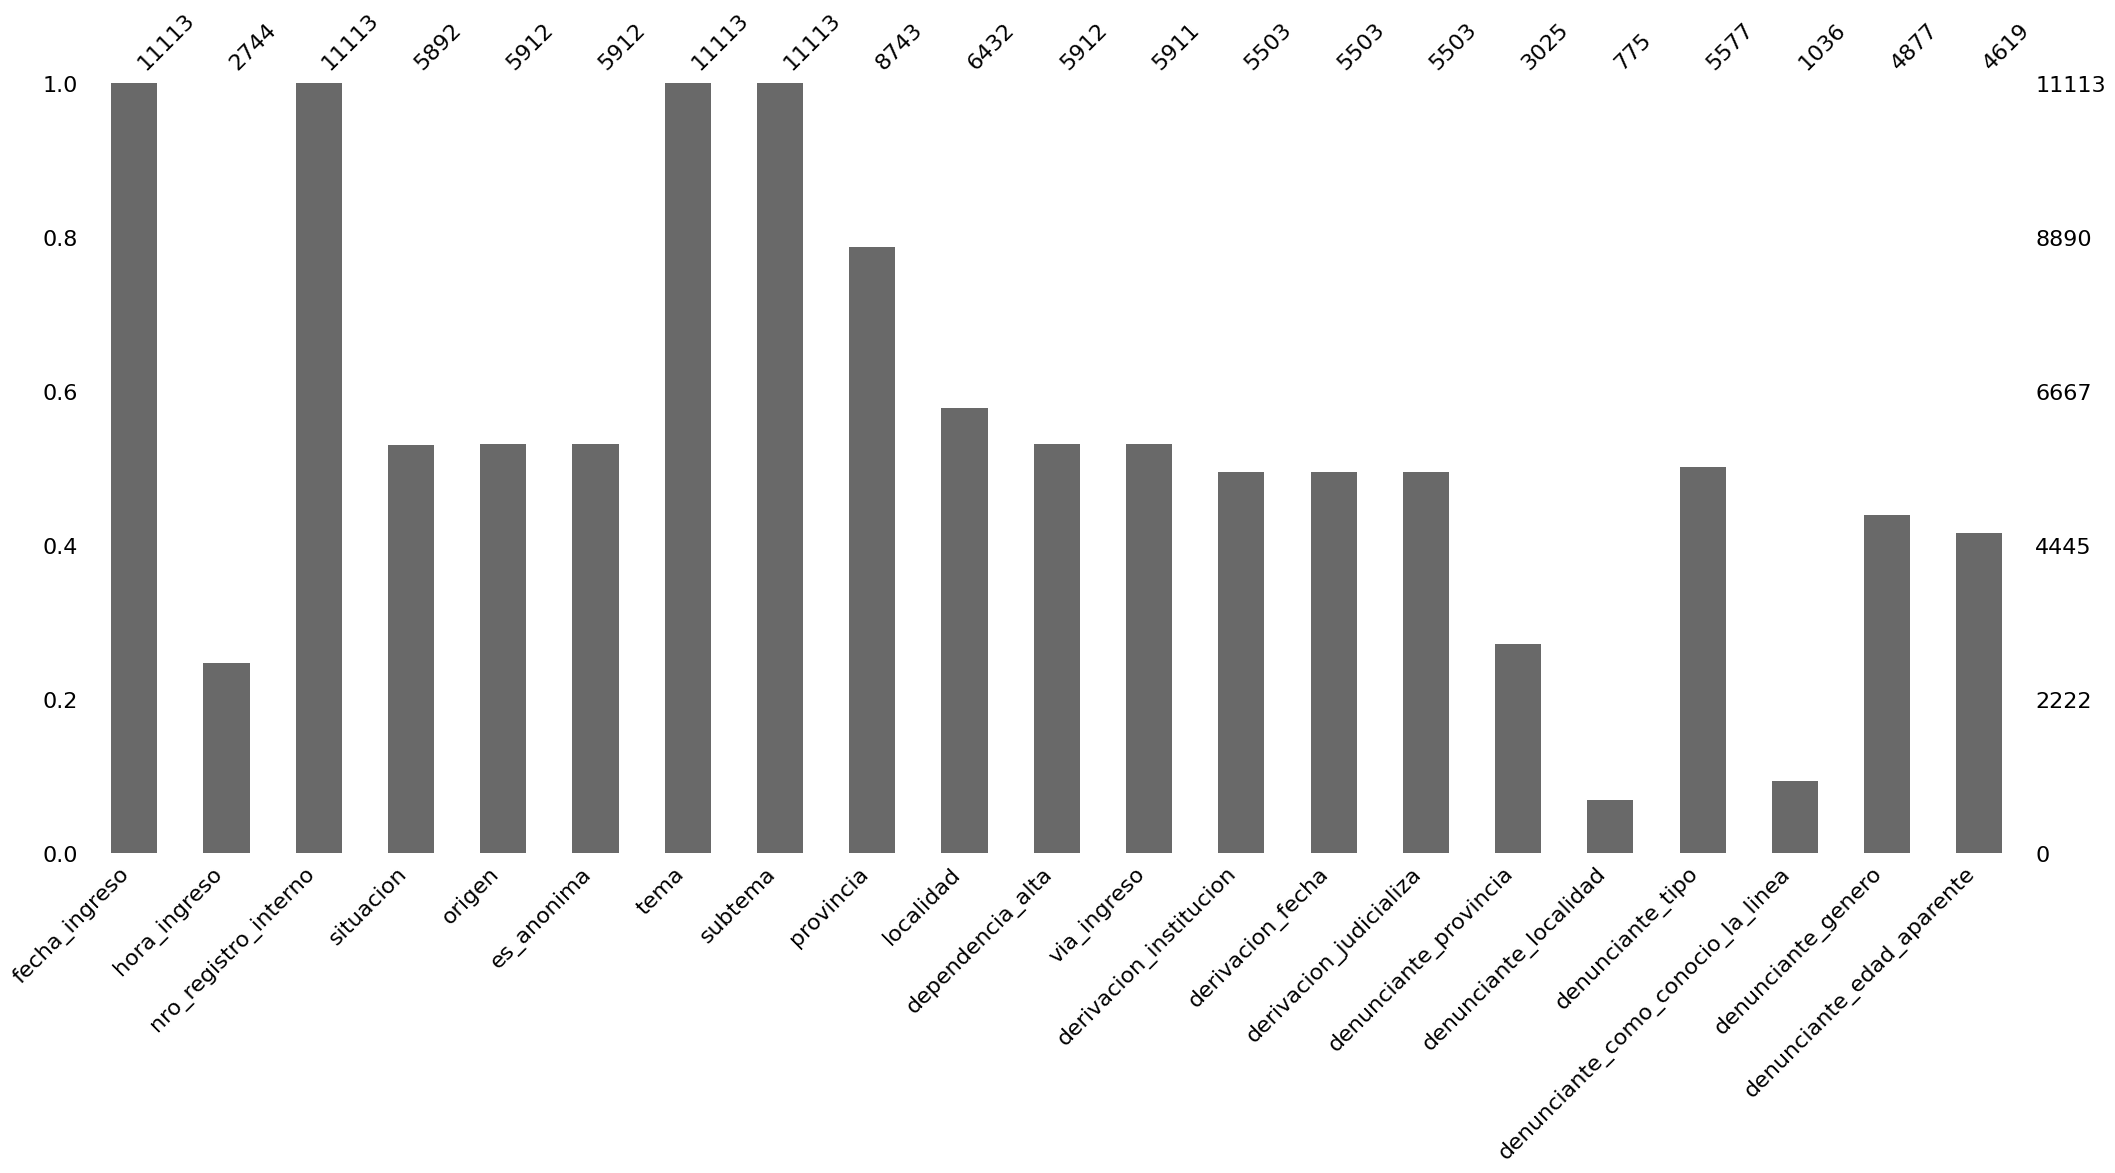

In [94]:
msno.bar(df_denuncias)

### Guardado de CSV

# CSV 2


### Lectura CSV

In [ ]:
#dataframes de orientaciones
df_orientaciones_uno = pd.read_csv('../datos/csv brutos/oficina-rescate-orientaciones-202001-202307.csv')
df_orientaciones_dos = pd.read_csv('../datos/csv brutos/oficina-rescate-orientaciones-referidos-202001-202307.csv')

In [ ]:
df_orientaciones = pd.concat([df_orientaciones_uno, df_orientaciones_dos], sort=False)

In [ ]:
df_orientaciones.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,consultante_genero,consultante_edad_aparente,provincia_indec_id,fecha_ingreso_consulta,referido_tipo,nacionalidad,genero,edad_aparente,embarazada,discapacidad
66,NaN,NaN,2575055505,NaN,NaN,NaN,Abuso sexual infantil,Abuso sexual infantil,Buenos Aires,Buenos Aires,...,NaN,NaN,6.0,2020-03-10,Acusado,NaN,Mujer,NaN,No,NaN
361,NaN,NaN,1525057505,NaN,NaN,NaN,Trata,Otro,Buenos Aires,Udaondo,...,NaN,NaN,6.0,2020-09-12,Acusado,NaN,Hombre,NaN,No,NaN
2053,2021-07-16,NaN,9405254515,Urgencia,Ciudadano,No,Violencia de género,Física,NaN,NaN,...,Mujer,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Modificando columnas

### Valores

,accidentes_hora,accidentes_via_nombre,accidentes_via_numero,accidentes_distrito,accidentes_longitud,accidentes_latitud,accidentes_localidad
ï»¿num_expediente,,,,,,,
2022S023892,7:40:00,CALL. DULCE CHACON / CMNO. FUENTE DE LA MORA,15,HORTALEZA,"443820,082","4481706,275",Madrid
2022S000481,20:15:00,CALL. VELAZQUEZ / CALL. JOAQUIN COSTA,146,CHAMARTÃN,"442106,722","4477104,944",Madrid
2022S017784,21:45:00,"AVDA. DEMOCRACIA, 3",3,PUENTE DE VALLECAS,"446937,294","4470421,422",Madrid


### Remplazo de Na

### Guardado de CSV

## Conclucion: